In [1]:
import os

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-2])
DATA_PATH = f'{ROOT_PATH}/TIL/Dataset/SeoulMetro'

In [3]:
FONT_PATH = '/usr/share/fonts/NanumMyeongjo.ttf'
font = font_manager.FontProperties(fname = FONT_PATH).get_name()
rc('font', family = font)

In [4]:
df = pd.read_csv(f'{DATA_PATH}/num_humans.csv', encoding = 'cp949')
df.sample(5).T

,8002,15886,13505,11915,2638
사용일자,20230821,20230808,20230812,20230815,20230830
호선명,분당선,경인선,경춘선,수인선,경부선
역명,구룡,개봉,금곡,소래포구,명학
승차총승객수,2767,21687,1112,4252,10814
하차총승객수,2630,21446,1043,4211,10440
등록일자,20230824,20230811,20230815,20230818,20230902


In [5]:
df         = df[['사용일자', '호선명', '승차총승객수', '하차총승객수']]
lines      = set(sorted(df['호선명']))
dates      = set(sorted([str(date) for date in df['사용일자']]))

sum_pivots = lambda line, value: pd.pivot_table(df[df['호선명'] == line], index = '사용일자',
                                         columns = '호선명', values = value, aggfunc = 'sum')
riding_df  = [sum_pivots(line, '승차총승객수') for line in lines]
quit_df    = [sum_pivots(line, '하차총승객수') for line in lines]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '20230727'),
  Text(1, 0, '20230728'),
  Text(2, 0, '20230729'),
  Text(3, 0, '20230730'),
  Text(4, 0, '20230731'),
  Text(5, 0, '20230801'),
  Text(6, 0, '20230802'),
  Text(7, 0, '20230803'),
  Text(8, 0, '20230804'),
  Text(9, 0, '20230805'),
  Text(10, 0, '20230806'),
  Text(11, 0, '20230807'),
  Text(12, 0, '20230808'),
  Text(13, 0, '20230809'),
  Text(14, 0, '20230810'),
  Text(15, 0, '20230811'),
  Text(16, 0, '20230812'),
  Text(17, 0, '20230813'),
  Text(18, 0, '20230814'),
  Text(19, 0, '20230815'),
  Text(20, 0, '20230816'),
  Text(21, 0, '20230817'),
  Text(22, 0, '20230818'),
  Text(23, 0, '20230819'),
  Text(24, 0, '20230820'),
  Text(25, 0, '20230821'),
  Text(26, 0, '20230822'),
  Text(27, 0, '20230823'),
  Text(28, 0, '20230824'),
  

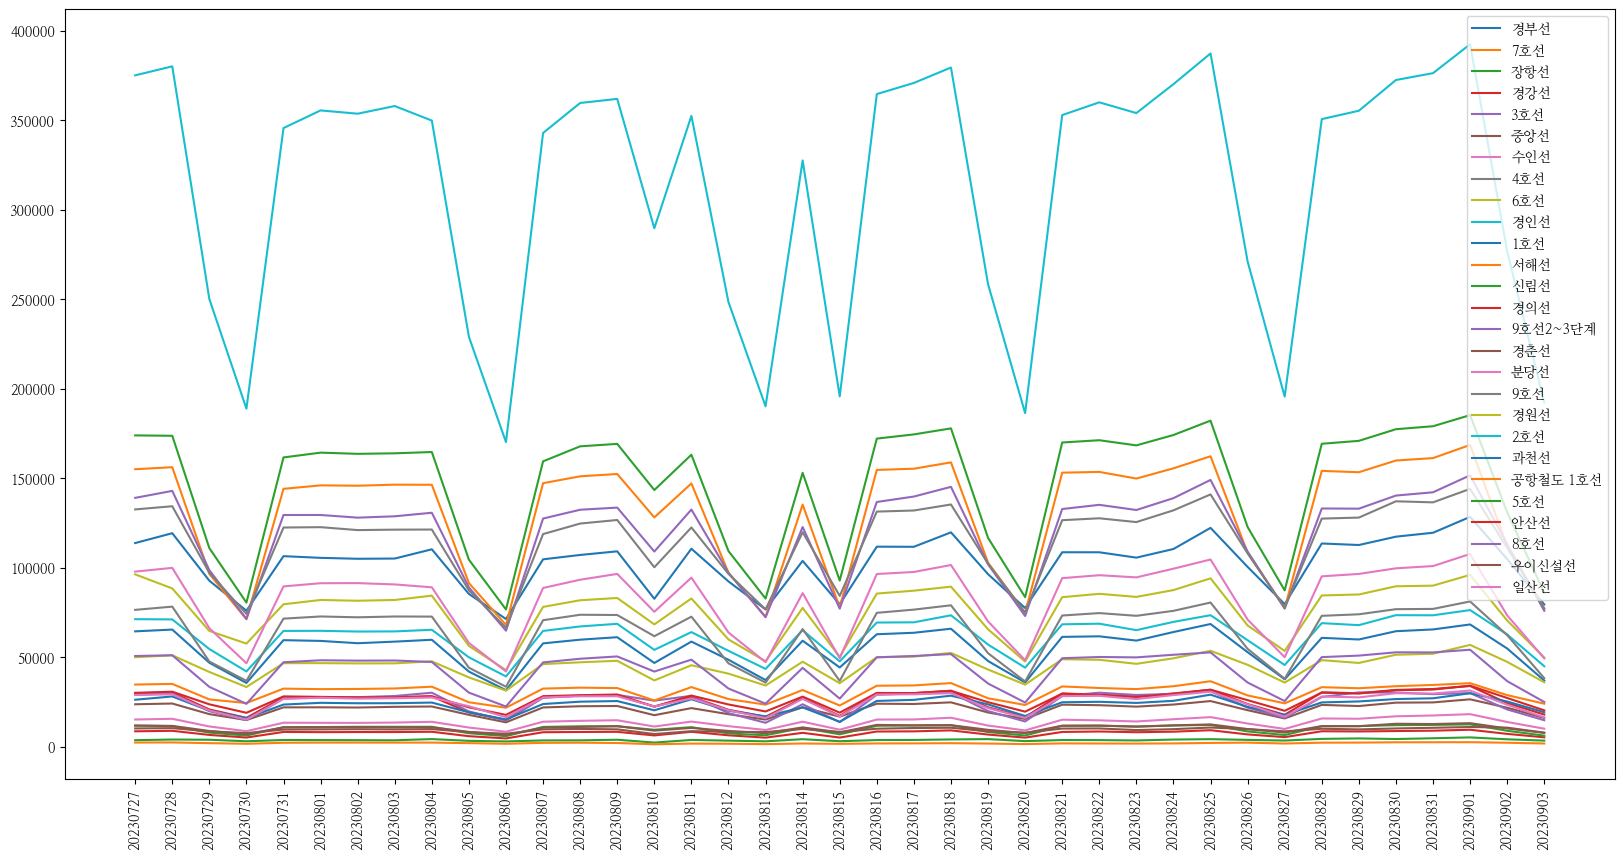

In [6]:
plt.figure(figsize = (20, 10))
for riding in riding_df:
    label = riding.columns.to_list()[0]
    plt.plot(sorted(list(dates)), riding.values/4, label = label)
    
plt.legend()
plt.xticks(rotation = 90)